In [108]:
import site
site.addsitedir('/anaconda/lib/python2.7/site-packages')
import pandas as pd 
import numpy as np 
from pymongo import MongoClient


city = 'Seattle'
state = 'WA'
client = MongoClient('localhost', 27017)
db = client['neighborhood_recommender']
yelp_collection = db['yelp_data' + '_' + city + '_' + state]
hoods = db['hood_data_Seattle_WA']
cursor = yelp_collection.find()

data = [hood for hood in cursor]

df = pd.DataFrame(data)

d = hoods.find()
hoods = [hood for hood in d]


In [109]:
df_h = pd.DataFrame(hoods)

dff = pd.merge(df_h, df, left_on ='id', right_on = 'hood_id')




In [123]:
z = dff.groupby(['name_x'])['id_y'].count()
z

name_x
Admiral                20
Alki                   20
Atlantic               20
Ballard                20
Beacon Hill            20
Belltown               20
Bitter Lake            20
Blue Ridge             20
Briarcliff             20
Broadmoor              20
Broadview              20
Broadway               20
Bryant                 20
Capitol Hill           20
Cascade                20
Cedar Park             20
Central                20
Columbia City          20
Crown Hill             19
Denny Triangle         20
Downtown               20
Dunlap                 20
East Queen Anne        20
Eastlake               20
Fairmount Park         20
Fauntleroy              1
First Hill             20
Fremont                20
Garfield               20
Gatewood               14
                       ..
Pioneer Square         20
Portage Bay            20
Rainier Beach          20
Rainier View           20
Ravenna                20
Riverview              20
Roosevelt              20
Roxhi

In [125]:
dff.ix[dff['name_x'] == 'Sand Point', 'id_y']

1705                        kendalls-dj-and-event-seattle
1706                         time-out-sports-bar-kirkland
1707                                        liams-seattle
1708                                     eureka-seattle-4
1709                              brix-wine-cafe-kirkland
1710                                 juanita-pub-kirkland
1711                              elemental-pizza-seattle
1712                     the-lodge-sports-grille-kirkland
1713           joey-kitchen-at-university-village-seattle
1714                            tiki-joes-wetbar-kirkland
1715             mamma-melina-ristorante-pizzeria-seattle
1716                                     wet-bar-kirkland
1717                 lake-street-bar-and-grill-kirkland-2
1718                              emerald-garden-kirkland
1719                                 karaoke-kurt-seattle
1720    alaska-airlines-arena-at-hec-edmundson-pavilio...
1721                                dj-doug-friday-harbor
1722          

In [14]:
x = df['categories'].value_counts()

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

(0, 150)

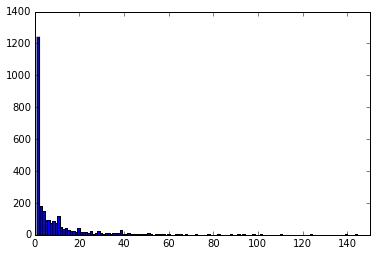

In [26]:
plt.hist(x.values, bins = 1000)
plt.xlim([0,150])

In [27]:
x[-200:-100]

[[Delis, delis], [Italian, italian], [Gluten-Free, gluten_free]]                                 1
[[Cajun/Creole, cajun], [Chinese, chinese]]                                                      1
[[Hot Dogs, hotdog], [German, german], [Gastropubs, gastropubs]]                                 1
[[Latin American, latin], [Ethnic Food, ethnicmarkets]]                                          1
[[Sandwiches, sandwiches], [Breakfast & Brunch, breakfast_brunch], [Burgers, burgers]]           1
[[Ice Cream & Frozen Yogurt, icecream], [Sandwiches, sandwiches], [Pop-up Shops, popupshops]]    1
[[Italian, italian], [Wine Bars, wine_bars], [Desserts, desserts]]                               1
[[Breakfast & Brunch, breakfast_brunch], [Mexican, mexican], [Burgers, burgers]]                 1
[[Juice Bars & Smoothies, juicebars], [Gluten-Free, gluten_free]]                                1
[[Comfort Food, comfortfood], [Barbeque, bbq]]                                                   1
[[American

In [46]:
df.ix[df['categories'] == "[[u'Bars', u'bars']]", 'name'].value_counts()

42333

In [53]:
df['categories'] = df['categories'].astype(str)

In [54]:
df.drop_duplicates()

TypeError: unhashable type: 'list'

In [64]:
df2 = df.ix[:, ['id','hood_id','categories','ratings','search_term','number_reviews']].drop_duplicates()

In [66]:
df2.groupby(['hood_id','search_term'])['id'].count()

hood_id  search_term
250017   nightlife      160
         restaurants    260
250050   nightlife      160
         restaurants    260
250146   nightlife        8
         restaurants     57
250149   nightlife       33
         restaurants    163
250150   nightlife      160
         restaurants    260
250206   nightlife      158
         restaurants    260
250383   nightlife       38
         restaurants    108
250478   nightlife      138
         restaurants     18
250692   nightlife      160
         restaurants    260
250714   nightlife      160
         restaurants    260
250780   nightlife      160
         restaurants    260
250788   nightlife      160
         restaurants    259
250801   nightlife       61
         restaurants    251
250889   nightlife        5
         restaurants     81
250939   nightlife      160
         restaurants    260
                       ... 
344021   nightlife       52
         restaurants    239
344022   nightlife       30
         restaurants    168

In [68]:
df2.groupby(['id'])['id'].count()

id
1-2-3-thai-food-seattle                           6
1-republik-north-arlington                        1
1-restaurant-westminster-2                        1
1020-bar-new-york                                 1
105-ten-bar-and-grill-briarcliff-manor            2
10th-street-live-kenilworth-2                     1
121-on-main-round-rock-2                          2
125th-street-grill-seattle                        7
13-coins-restaurant-seattle                       2
135-chinese-restaurant-lakewood                   1
137-bar-and-grill-new-york                        1
137-broadway-chinese-restaurant-new-york          1
14-and-hudson-kitchen-and-bar-piermont            1
14-carrot-cafe-seattle                            5
14-carrot-taco-stand-seattle                     21
14-parish-caribbean-kitchen-hackensack            2
1431-cafe-cedar-park                              1
15-fox-place-jersey-city                          1
1512-new-york                                     1
16-front-